# IMPORT RELEVANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

# READ FILES

In [5]:
train_data= pd.read_csv(r'C:\Users\RUQOYYAH\ABKAGGLE\train.csv')
test_data = pd.read_csv(r'C:\Users\RUQOYYAH\ABKAGGLE\test.csv')
sample = pd.read_csv(r'C:\Users\RUQOYYAH\ABKAGGLE\gender_submission.csv')
print(train_data.shape)
print(test_data.shape)
train_data.head()

(891, 12)
(418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA(EXPLORATORY DATA ANALYSIS)

In [6]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
print('missing values: ', train_data.isnull().sum())
print('missing values: ', test_data.isnull().sum())

missing values:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
missing values:  PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
# find the type of the data
print(train_data.select_dtypes('float').columns)
print(train_data.select_dtypes('integer').columns)
print(train_data.select_dtypes('object').columns)

Index(['Age', 'Fare'], dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [10]:
# merge together both train and test data for easy data analysis
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
all_data = pd.concat((train_data, test_data)).reset_index(drop=True)

C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [11]:
all_data.describe()#statistic summary of numeric values

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [12]:
#check for dupliacate rows
duplicate_rows = all_data[all_data.duplicated()]
print(duplicate_rows.shape)

(0, 12)


In [13]:
pandas_profiling is a python library for quick analysis
import pandas_profiling as pf
report = pf.ProfileReport(train_data)# I decided to use train data only here for easy readability
report.to_file('df_report.html')# save it as html file

C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\RUQOYYAH\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\RUQOYYAH\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  

In [14]:
# find the values of categorical feature in the data
#and how much each is present
print(all_data['Embarked'].unique())
print(all_data['Sex'].unique())
print(all_data['Embarked'].value_counts())

['S' 'C' 'Q' nan]
['male' 'female']
S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [15]:
#Check for how much other features correlate with the target feature(Survive)
# this can be use for feature engineering.
all_data.corr()['Survived'].sort_values().head(13)
#fare is the most positive correlated while pclass is the most negative.

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

# EDA(VISUALIZATION)

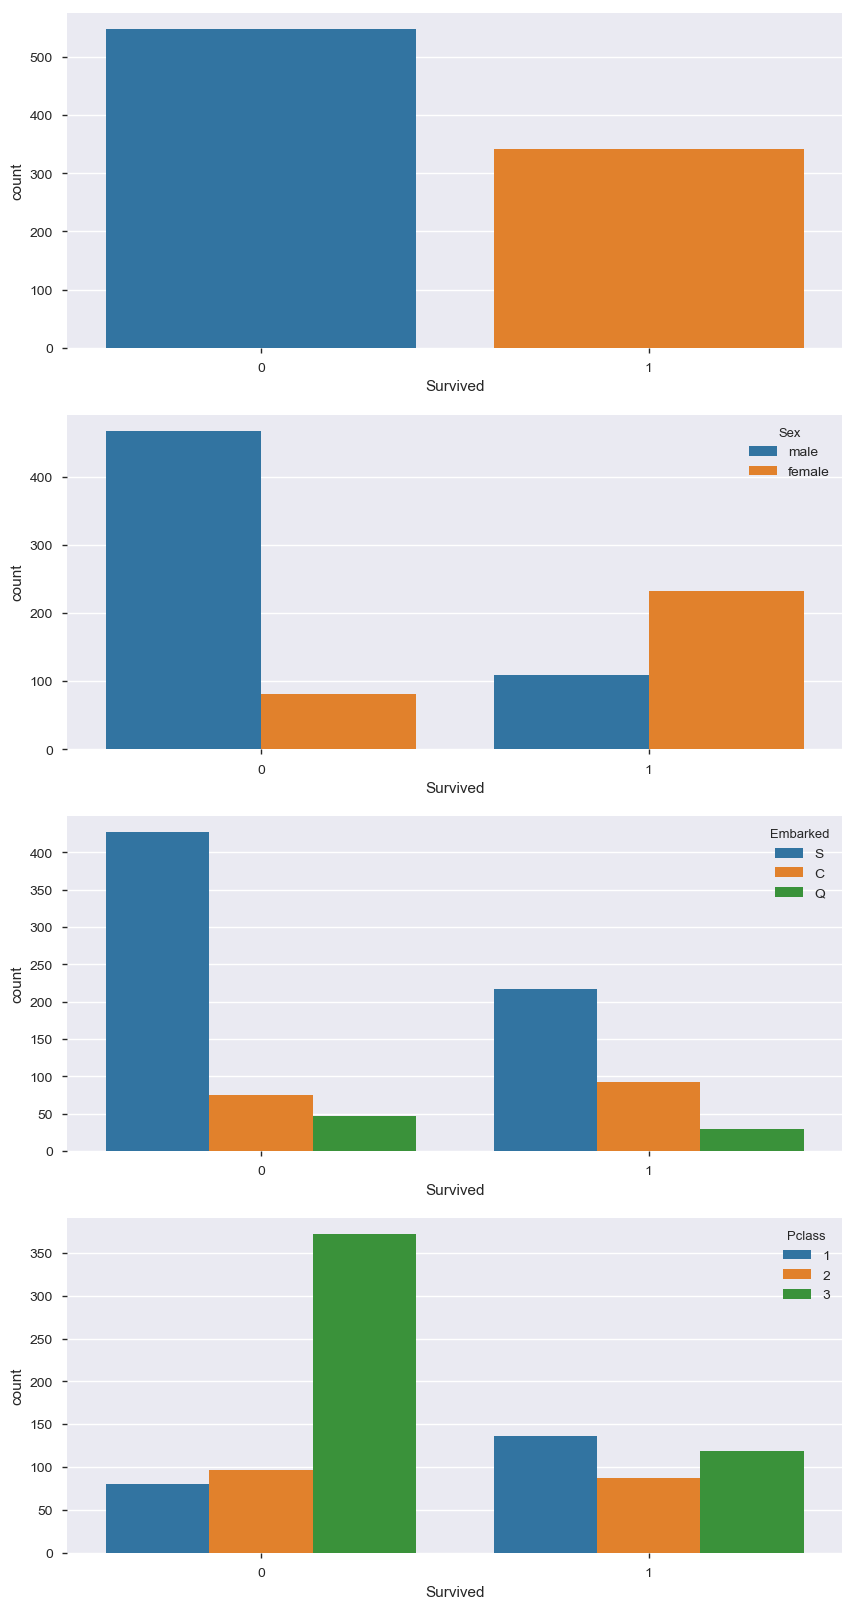

In [18]:
# Check for balance target value
f, axes = plt.subplots(4, 1, figsize=[10, 20])
sns.countplot(x = "Survived", data = train_data, ax=axes[0])
sns.countplot(x = "Survived", hue = 'Sex', data = train_data, ax=axes[1])
sns.countplot(x = "Survived", hue = 'Embarked', data = train_data, ax=axes[2])
sns.countplot(x = "Survived", hue = 'Pclass', data = train_data, ax=axes[3])

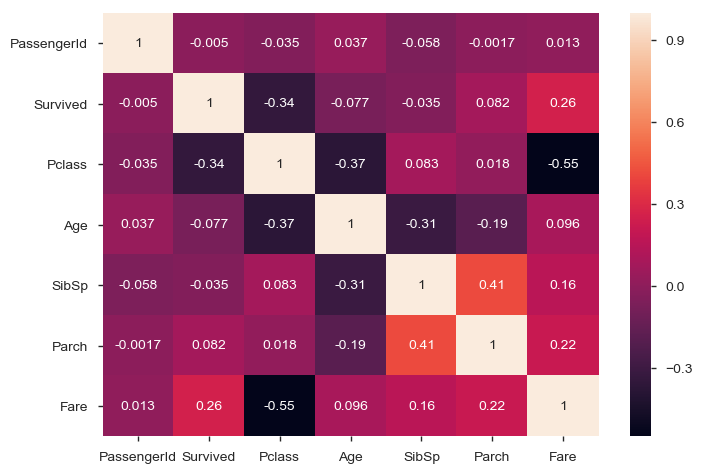

In [19]:
sns.heatmap(train_data.corr(), annot=True)

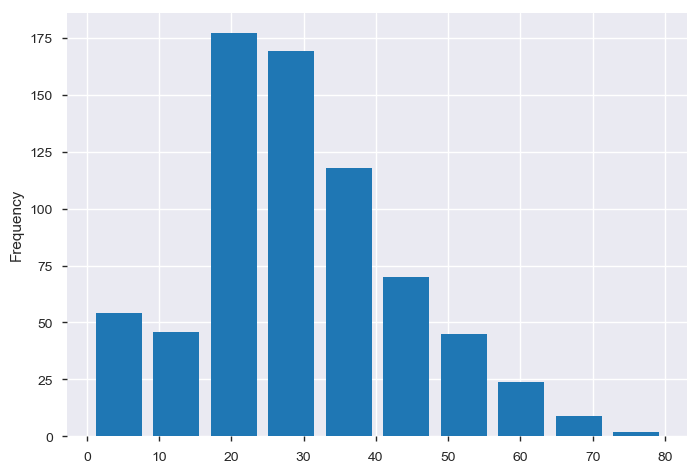

In [20]:
# check for the distribution, this is well distribued not skewed.
train_data['Age'].plot(kind= 'hist', histtype='bar',rwidth = 0.8)

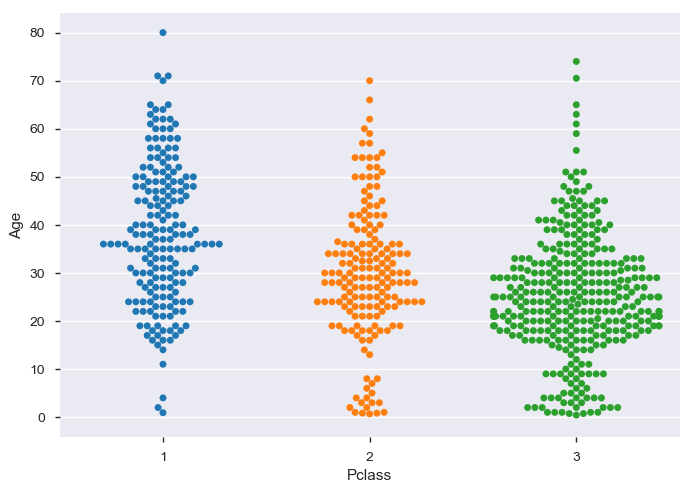

In [21]:
# passenger class3 contain a lot of people age 20 -40
sns.swarmplot(x = 'Pclass', y = 'Age', data = train_data)

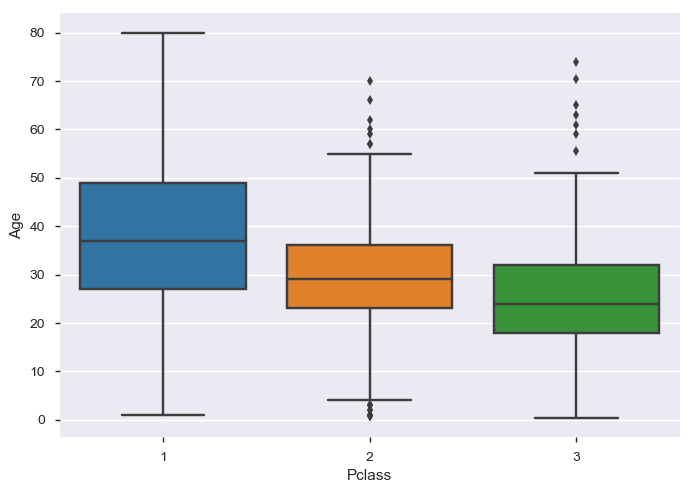

In [22]:
# check for outliers
sns.boxplot(x = "Pclass", y = "Age", data = train_data)

# FEATURE ENGINEERING

In [23]:
# Extract title from the name column and make it numeric
all_data['Title'] = all_data['Name'].apply(lambda x: x.split(",")[1].strip().split(' ')[0])
print(all_data['Title'])
all_data['Title'] = [0 if x in ['Mr.','Miss.','Mrs.'] else 1 for x in all_data['Title']]
print(all_data['Title'])


0           Mr.
1          Mrs.
2         Miss.
3          Mrs.
4           Mr.
         ...   
1304        Mr.
1305      Dona.
1306        Mr.
1307        Mr.
1308    Master.
Name: Title, Length: 1309, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    1
Name: Title, Length: 1309, dtype: int64


In [25]:
# use pandas dummy to convert from string to numeric
categorical = ['Sex', 'Embarked']
all_dummies = pd.get_dummies(all_data, prefix_sep='_',columns= categorical,drop_first=True)
all_data = all_dummies
all_data.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Title,Sex_male,Embarked_Q,Embarked_S
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,0.0,A/5 21171,0,1,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1.0,PC 17599,0,0,0,0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,1.0,STON/O2. 3101282,0,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1.0,113803,0,0,0,1
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,3,0,0.0,373450,0,1,0,1


In [26]:
#drop passengerid(insignificant), cabin( lot of missing value),
#ticket(not relevant), Name(have been extracted)
all_data = all_data.drop(['PassengerId', 'Cabin', 'Ticket','Name'], axis = 1)


# fill missing value

In [27]:
#Embarked has two missing value in the data.fill with mode(most common)
#missing value for Embarked is found only in train data
train_data['Embarked'].fillna('S', inplace = True)

In [28]:
all_data.isnull().sum()

Age           263
Fare            1
Parch           0
Pclass          0
SibSp           0
Survived      418
Title           0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [29]:
# Replace missing values in age with MICE values
from impyute.imputation.cs import mice
imputed = mice(all_data.values)
mice_ages = imputed[:,0]
mice_ages = [0 if age < 0 else age for age in mice_ages]
all_data['miced_age'] = mice_ages

In [30]:
all_data.drop('Age', axis =1, inplace = True)

In [32]:
#split up the concat train and test data
data = all_data[:ntrain]
test = all_data[ntrain:]
print(test.shape)
test.drop("Survived", axis = 1, inplace = True)
print(test.shape)

(418, 10)
(418, 9)


C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
#Define X and y and split data into train and test
X = data.drop("Survived", axis = 1)
y = data['Survived']
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Train Data On Models and Check Metrics¶


In [36]:
from sklearn.preprocessing.imputation import Imputer

my_imputer = Imputer()
imputed_x_train = my_imputer.fit_transform(X_train)
imputed_x_valid = my_imputer.transform(X_valid)

C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [37]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

import lightgbm
from lightgbm import LGBMClassifier

In [38]:
lmodel = LGBMClassifier()
lmodel.fit(imputed_x_train, y_train)
lpred = lmodel.predict(imputed_x_valid)
#classification_report(lpred, y_valid)
accuracy_score(lpred, y_valid)
#confusion_matrix(lpred, y_valid)

0.8440677966101695

In [39]:
lmodel.fit(X, y)
Final_pred = lmodel.predict(test)

In [40]:
test_id = sample['PassengerId']
output = pd.DataFrame({'PassengerId': test_id,
                       'Survived': Final_pred})

In [41]:
output.to_csv('First_submission.csv', index = False)